### 3D plot for decodability: hypothesis

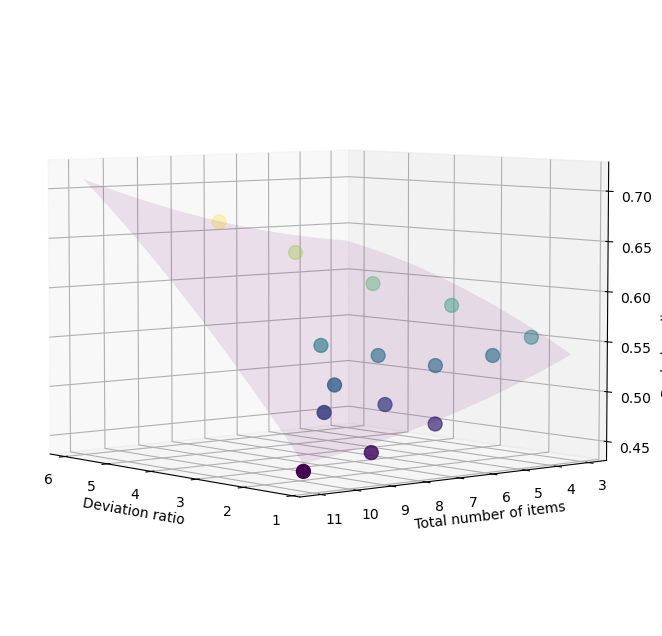

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Example data
numerosity_pairs = [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 3), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6), (4, 5), (4, 6), (5, 6)]
total_paired_numerosity = np.array([sum(pair) for pair in numerosity_pairs])  # y-axis
deviation_ratios = np.array([pair[1] / pair[0] for pair in numerosity_pairs])  # x-axis
decoding_accuracy = np.array([0.55, 0.58, 0.6, 0.63, 0.66, 0.54, 0.53, 0.54, 0.55, 0.48, 0.50, 0.52, 0.46, 0.50, 0.45])  # z-axis (example values)


# Combine x and y data for nonlinear regression
X = np.column_stack((deviation_ratios, total_paired_numerosity))
y = decoding_accuracy

# Add polynomial features (e.g., quadratic terms)
poly = PolynomialFeatures(degree=2, include_bias=False)  # Degree 2 for nonlinear trend
X_poly = poly.fit_transform(X)

# Fit a polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Create a grid for plotting the nonlinear surface
x_range = np.linspace(deviation_ratios.min(), deviation_ratios.max(), 10)
y_range = np.linspace(total_paired_numerosity.min(), total_paired_numerosity.max(), 10)
x_grid, y_grid = np.meshgrid(x_range, y_range)
grid_points = np.column_stack([x_grid.ravel(), y_grid.ravel()])
grid_poly = poly.transform(grid_points)
z_grid = model.predict(grid_poly).reshape(x_grid.shape)

# 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot the nonlinear trend surface
ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.1, color='darkmagenta')

# Scatter plot
sc = ax.scatter(deviation_ratios, total_paired_numerosity, decoding_accuracy, 
                c=decoding_accuracy, cmap='viridis', s=100, label='Data Points')



# Axis labels
ax.set_xlabel('Deviation ratio', size=10)
ax.set_ylabel('Total number of items', size=10)
ax.set_zlabel('Peak decoding accuracy', size=10)

# Change the viewing angle
ax.view_init(elev=5, azim=140)  # Set elevation and azimuth (e.g., elev=30, azim=120)
plt.savefig('image.png', dpi=300)

plt.show()


### Ideal data plots 3D for concept response curve
Primary effect: yes
Nuisance effect: No

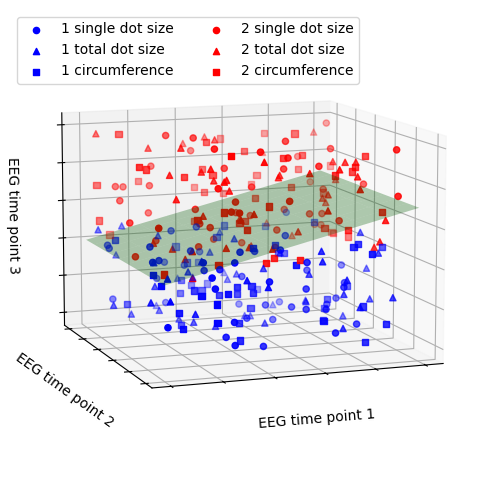

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin) * np.random.rand(n) + vmin

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')

n = 50  # Total points per numerosity
points_per_shape = 50  # Points per shape (circle, triangle, square)

# Define the shapes and colors
shapes = ['o', '^', 's']  # Circle, Triangle, Square
colors = ['b', 'r']  # Colors for each numerosity
labels = ['1', '2']
shape_labels = ['single dot size', 'total dot size', 'circumference']

# For each numerosity
for i, (color, zlow, zhigh, label) in enumerate(zip(colors, [0, 0.4], [0.5, 1], labels)):
    for j, (shape, shape_label) in enumerate(zip(shapes, shape_labels)):
        xs = randrange(points_per_shape, 0, 1)
        ys = randrange(points_per_shape, 0, 1)
        zs = randrange(points_per_shape, zlow, zhigh)
        ax.scatter(xs, ys, zs, color=color, marker=shape, label=f'{label} {shape_label}')

# Set axis labels
ax.set_xlabel('EEG time point 1', size=10)
ax.set_ylabel('EEG time point 2', size=10)
ax.set_zlabel('EEG time point 3', size=10)

# Remove numerical tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# Set view angle
ax.view_init(elev=10, azim=70)

# Plot a hyperplane at z = 0.45 to separate numerosity 1 and numerosity 2
xx, yy = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
zz = np.meshgrid(np.linspace(0.7, 0.4, 10)) * np.ones_like(xx)  # Set the z-values of the plane

# Plot the hyperplane
ax.plot_surface(xx, yy, zz, color='green', alpha=0.3, edgecolor='none')
# Add a legend
ax.legend(loc='upper left', bbox_to_anchor=(0, 1), ncol=2)
# plt.tight_layout()

# Save and show plot
plt.savefig('image.png')
plt.show()


Primary effect = Yes, Nuisance effect = No

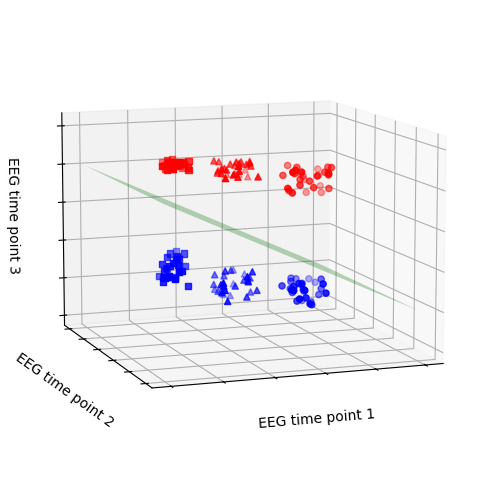

In [157]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin) * np.random.rand(n) + vmin

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')

n = 50  # Total points per numerosity
points_per_shape = 30  # Points per shape (circle, triangle, square)

# Define the shapes, colors, and labels
shapes = ['o', '^', 's']  # Circle, Triangle, Square
colors = ['b', 'r']  # Colors for each numerosity
labels = ['1', '2']
shape_labels = ['single dot size', 'total dot size', 'circumference']

# Define spatial clusters for each shape and label
shape_x_ranges = [(0, 0.2), (0.5, 0.65), (0.9, 1)]  # X-axis ranges for circle, triangle, square
shape_y_ranges = [(0, 0.2), (0.5, 0.65), (0.9, 1)]  # Y-axis ranges for circle, triangle, square
shape_z_ranges = [(0, 0.15), (0.2, 0.35), (0.4, 0.55)]  # Z-axis ranges for numerosity 1 shapes
shape_z_ranges_2 = [(0.6, 0.75), (0.8, 0.9), (0.95, 1)]  # Z-axis ranges for numerosity 2 shapes

# Plot points for each numerosity and shape
for i, (color, label) in enumerate(zip(colors, labels)):
    # Choose z range based on numerosity label
    z_ranges = shape_z_ranges if label == '1' else shape_z_ranges_2
    
    for j, (shape, shape_label) in enumerate(zip(shapes, shape_labels)):
        # Use specific ranges for each shape to create distinct clusters
        xs = randrange(points_per_shape, *shape_x_ranges[j])
        ys = randrange(points_per_shape, *shape_y_ranges[j])
        zs = randrange(points_per_shape, *z_ranges[j])
        
        ax.scatter(xs, ys, zs, color=color, marker=shape, label=f'{label} {shape_label}')

# Set axis labels
ax.set_xlabel('EEG time point 1', size=10)
ax.set_ylabel('EEG time point 2', size=10)
ax.set_zlabel('EEG time point 3', size=10)
# Remove numerical tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# Set view angle for better visibility
ax.view_init(elev=10, azim=70)

# Plot a hyperplane between numerosity 1 and 2
xx, yy = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
zz =np.meshgrid(np.linspace(0.2, 0.8, 10)) * np.ones_like(xx)  # Place the hyperplane between the z-ranges of the two labels

# Plot the hyperplane
ax.plot_surface(xx, yy, zz, color='green', alpha=0.3, edgecolor='none')

# Save and show plot
plt.savefig('image.png')
plt.show()


Primary effect = No, Nuisance effect = No

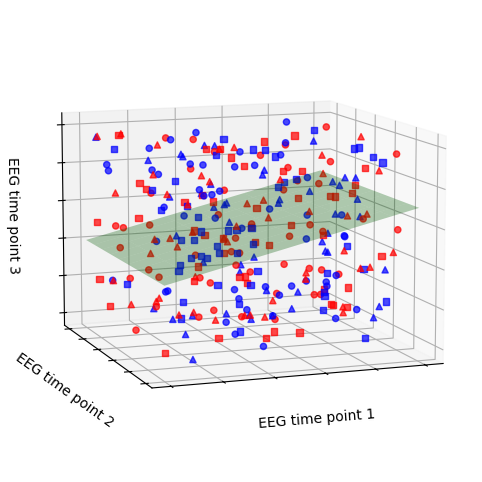

In [141]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin) * np.random.rand(n) + vmin

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')

n = 150  # Total points to be randomly scattered

# Define the shapes and colors
shapes = ['o', '^', 's']  # Circle, Triangle, Square
colors = ['b', 'r']  # Colors for each numerosity
shape_labels = ['single dot size', 'total dot size', 'circumference']

# Randomly plot points without considering label-based clustering
for i, (color, shape, shape_label) in enumerate(zip(colors * 3, shapes * 2, shape_labels * 2)):
    xs = randrange(n // 3, 0, 1)
    ys = randrange(n // 3, 0, 1)
    zs = randrange(n // 3, 0, 1)
    ax.scatter(xs, ys, zs, color=color, marker=shape, label=f'{shape_label}', alpha=0.7)

# Set axis labels
ax.set_xlabel('EEG time point 1', size=10)
ax.set_ylabel('EEG time point 2', size=10)
ax.set_zlabel('EEG time point 3', size=10)

# Remove numerical tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# Set view angle for better visibility
ax.view_init(elev=10, azim=70)
# Plot a hyperplane at z = 0.45 to separate numerosity 1 and numerosity 2
xx, yy = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
zz = np.meshgrid(np.linspace(0.7, 0.4, 10)) * np.ones_like(xx)  # Set the z-values of the plane

# Plot the hyperplane
ax.plot_surface(xx, yy, zz, color='green', alpha=0.3, edgecolor='none')

# Save and show plot
plt.savefig('image_randomized.png')
plt.show()


Primary effect = No, Nuisance effect = Yes

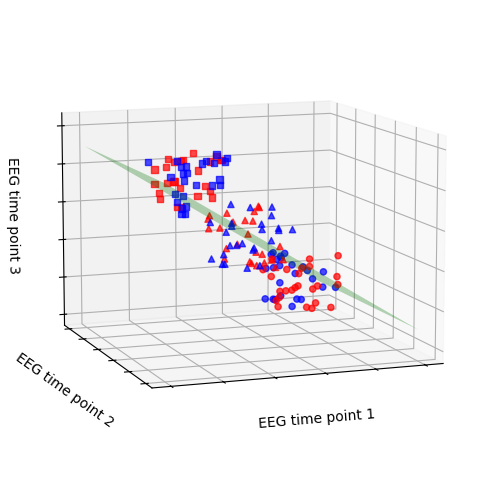

In [152]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin) * np.random.rand(n) + vmin

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')

n = 150  # Total points, divided among shapes and labels

# Define shapes and labels
shapes = ['o', '^', 's']  # Circle, Triangle, Square
shape_labels = ['single dot size', 'total dot size', 'circumference']

# Define colors based on labels '1' and '2'
colors = ['b', 'r']  # 'b' for label '1' and 'r' for label '2'
labels = ['1', '2']

# Define spatial clusters for each figure shape
shape_x_ranges = [(0, 0.3), (0.35, 0.65), (0.7, 1)]  # X-axis ranges for each shape
shape_y_ranges = [(0, 0.3), (0.35, 0.65), (0.7, 1)]  # Y-axis ranges for each shape
shape_z_ranges = [(0, 0.3), (0.35, 0.65), (0.7, 1)]  # Z-axis ranges for each shape

# Plot points for each shape, with color based on label '1' or '2'
for i, (shape, shape_label) in enumerate(zip(shapes, shape_labels)):
    for j, label in enumerate(labels):
        color = colors[j]
        xs = randrange(n // 6, *shape_x_ranges[i])
        ys = randrange(n // 6, *shape_y_ranges[i])
        zs = randrange(n // 6, *shape_z_ranges[i])
        ax.scatter(xs, ys, zs, color=color, marker=shape, label=f'{label} {shape_label}' if i == 0 else "", alpha=0.7)

# Set axis labels
ax.set_xlabel('EEG time point 1', size=10)
ax.set_ylabel('EEG time point 2', size=10)
ax.set_zlabel('EEG time point 3', size=10)

# Remove numerical tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# Set view angle for better visibility
ax.view_init(elev=10, azim=70)

# Plot a hyperplane at z = 0.45 to separate numerosity 1 and numerosity 2
xx, yy = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
zz = np.meshgrid(np.linspace(0.1, 0.9, 10)) * np.ones_like(xx)  # Set the z-values of the plane

# Plot the hyperplane
ax.plot_surface(xx, yy, zz, color='green', alpha=0.3, edgecolor='none')


# Save and show plot
plt.savefig('image_shape_color_label.png')
plt.show()


### Radius computation

In [96]:
import math

# Given area
area = 10  # cm²

# Calculate the radius
radius = math.sqrt(area / math.pi)

# Print the result
print(f"The radius of the circle is approximately {radius:.4f} cm")


The radius of the circle is approximately 1.7841 cm


### Circumference computation

In [97]:
# Given radius
radius = 1.7841  # cm
numerosity = 6
# Calculate the circumference
circumference = 2 * math.pi * radius
Total_circumference = circumference * numerosity
# Print the result
print(f"The circumference of the circle is approximately {circumference:.4f} cm")
print(f"The total circumference of the circle is approximately {Total_circumference:.4f} cm")


The circumference of the circle is approximately 11.2098 cm
The total circumference of the circle is approximately 67.2590 cm


### Auditory experiment 1
Using Wav.files.
Total duration is controlled (620 ms)

In [98]:

### ~~~~~~~~~~~~ import tools 
import pygame
import numpy as np
import random

### ~~~~~~~~~~~~ Initialize pygame mixer
pygame.mixer.init()


### ~~~~~~~~~~~~ Parameter Settings
I_sequence_I = 0.8
I_stimuli_I = 0.1
parameters = {
    1: {"duration": 0.62, "isi": 0},  # 1 beeps with 560ms duration and 0ms ISI
    2: {"duration": 0.26, "isi": I_stimuli_I},  # 2 beeps with 230ms duration and 100ms ISI
    3: {"duration": 0.14, "isi": I_stimuli_I}, # 3 beeps with 120ms duration and 100ms ISI
    4: {"duration": 0.085, "isi": I_stimuli_I},  # 4 beeps with 65ms duration and 100ms ISI
    5: {"duration": 0.044, "isi": I_stimuli_I},  # 5 beeps with 32ms duration and 100ms ISI
    6: {"duration": 0.02, "isi": I_stimuli_I} # 6 beeps with 10ms duration and 100ms ISI
}




### ~~~~~~~~~~~~ Randomize the order
# Convert dictionary items to a list and shuffle it
items = list(parameters.items())
random.shuffle(items)
# Create a new dictionary from the shuffled list of items
shuffled_parameters = dict(items)


### ~~~~~~~~~~~~ Import audio.wav file
plays=pygame.mixer.Sound("/Users/muku/Desktop/Ph.D_MaxPlanck/Research/MINT/experiment/stimuli/audio/beep-01a.wav")


### ~~~~~~~~~~~~ start numerosity loop
for numerosity, params in shuffled_parameters.items():
    num_beeps = numerosity
    duration = int(params["duration"]*1000)
    isi = params["isi"]


    for _ in range(num_beeps):
        # Play the sound
        plays.play()
        # Wait for the desired duration (e.g., 2 seconds)
        pygame.time.wait(duration)  # Duration in milliseconds
        # Stop the sound after the specified duration
        plays.stop()
        if _ < num_beeps - 1:
            pygame.time.wait(int(isi * 1000))

    
    pygame.time.wait(int(I_sequence_I * 1000)) # inter-sequence interval

### ~~~~~~~~~~~~ end numerosity loop


### ~~~~~~~~~~~~ Close pygame mixer
pygame.mixer.quit()


### Auditory Experiment 2
Using wav.files. 
Single item duration and rate is controlled (20ms)

In [131]:

### ~~~~~~~~~~~~ import tools 
import pygame
import numpy as np
import random

### ~~~~~~~~~~~~ Initialize pygame mixer
pygame.mixer.init()


### ~~~~~~~~~~~~ Parameter Settings
I_sequence_I = 0.8
I_stimuli_I = 0.1
singleItemduration = 0.02
parameters = {
    1: {"duration": singleItemduration, "isi": 0},  # 1 beeps with 10ms duration and 0ms ISI
    2: {"duration": singleItemduration, "isi": I_stimuli_I},  # 2 beeps with 10ms duration and 10ms ISI
    3: {"duration": singleItemduration, "isi": I_stimuli_I}, # 3 beeps with 10ms duration and 100ms ISI
    4: {"duration": singleItemduration, "isi": I_stimuli_I},  # 4 beeps with 10ms duration and 100ms ISI
    5: {"duration": singleItemduration, "isi": I_stimuli_I},  # 5 beeps with 10ms duration and 100ms ISI
    6: {"duration": singleItemduration, "isi": I_stimuli_I} # 6 beeps with 10ms duration and 100ms ISI
}



### ~~~~~~~~~~~~ Randomize the order
# Convert dictionary items to a list and shuffle it
items = list(parameters.items())
random.shuffle(items)
# Create a new dictionary from the shuffled list of items
shuffled_parameters = dict(items)


### ~~~~~~~~~~~~ Import audio.wav file
plays=pygame.mixer.Sound("/Users/muku/Desktop/Ph.D_MaxPlanck/Research/MINT/experiment/stimuli/audio/beep-01a.wav")


### ~~~~~~~~~~~~ start numerosity loop
for numerosity, params in shuffled_parameters.items():
    num_beeps = numerosity
    duration = int(params["duration"]*1000)
    isi = params["isi"]


    for _ in range(num_beeps):
        # Play the sound
        plays.play()
        # Wait for the desired duration (e.g., 2 seconds)
        pygame.time.wait(duration)  # Duration in milliseconds
        # Stop the sound after the specified duration
        plays.stop()
        if _ < num_beeps - 1:
            pygame.time.wait(int(isi * 1000))

    
    pygame.time.wait(int(I_sequence_I * 1000)) # inter-sequence interval

### ~~~~~~~~~~~~ end numerosity loop


### ~~~~~~~~~~~~ Close pygame mixer
pygame.mixer.quit()


### Figures for presentation
Example of EEG data for each numerosity

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sampling_rate = 1000  # Hz (samples per second)
duration = 1  # seconds
time = np.linspace(0, duration, duration * sampling_rate) *1000

base_wave = np.zeros(sampling_rate)+1

# Increase amplitude between 400 ms and 800 ms
start_time = 0.2  # 400 ms
end_time = 0.8    # 800 ms
midpoint = 300

amplitude_factors = [1.1, 2, 2.5, 2.7, 2.9, 3]
Numerosities = [1, 2, 3, 4, 5, 6]    

plt.figure(figsize=(12, 6))

for index, amplitude in enumerate(amplitude_factors):
    
    # Create a linearly increasing part
    increasing_part = np.exp(np.linspace(0, amplitude, midpoint))
    # Create a linearly decreasing part
    decreasing_part = np.exp(np.linspace(amplitude, 0, midpoint))
    # Combine them to form the final vector
    vector = np.concatenate([increasing_part, decreasing_part])

    # Find indices corresponding to 400 ms and 800 ms
    start_index = int(start_time * sampling_rate)
    end_index = int(end_time * sampling_rate)

    noise = 0.03 * np.random.randn(len(time))
    # Increase amplitude in the specified range
    wave = base_wave.copy() + noise
    wave[start_index:end_index] *= vector 

    plt.plot(time, wave, label=f'Numeorosity = {Numerosities[index]}')


# Adding some random noise to simulate real EEG data
# noise = 10 * np.random.randn(len(time))
# eeg_signal_1 += noise

plt.title('Simulated EEG Time-Series Data', size=20)
plt.xlabel('Time (ms)',size=20)
plt.ylabel('Amplitude (µV)',size=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.yticks([]) 
# Add grid for better readability
plt.grid(False)
# Remove the box line (spines)
ax = plt.gca()  # Get current axis
for spine in ax.spines.values():
    spine.set_visible(False)
# Draw lines at the 0-axis
plt.axhline(0, color='black', linestyle='-', linewidth=2)  # Horizontal line at y=0
plt.axvline(0, color='black', linestyle='-', linewidth=2)  # Vertical line at x=0
plt.legend(fontsize=20, loc='best')
# Fill area between x=495 ms and x=505 ms
x_fill_start = 480
x_fill_end = 520
plt.fill_between([x_fill_start,x_fill_end], 22, color='lightgray', alpha=0.5, label='Highlighted Area')

# Save the plot to a file
plt.savefig('/Users/muku/Desktop/figure.png', format='png', dpi=300, bbox_inches='tight')


plt.show()



Examples of time-resolved average accuracy 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sampling_rate = 100  # Hz (samples per second)
duration = 1  # seconds
time = np.linspace(0, duration, duration * sampling_rate) *1000

base_wave = np.zeros(sampling_rate)+40

# Increase amplitude between 400 ms and 800 ms
start_time = 0.2  # 400 ms
end_time = 0.8    # 800 ms
midpoint = 30

amplitude_factors = 0.6  

plt.figure(figsize=(12, 6))

    
# Create a linearly increasing part
increasing_part = np.exp(np.linspace(0, amplitude_factors, midpoint))
# Create a linearly decreasing part
decreasing_part = np.exp(np.linspace(amplitude_factors, 0, midpoint))
# Combine them to form the final vector
vector = np.concatenate([increasing_part, decreasing_part])

# Find indices corresponding to 400 ms and 800 ms
start_index = int(start_time * sampling_rate)
end_index = int(end_time * sampling_rate)

noise = 1.1 * np.random.randn(len(time))
# Increase amplitude in the specified range
wave = base_wave.copy() + noise
wave[start_index:end_index] *= vector 

# Simulate standard deviation (just for demonstration)
std_dev = 3 

# Plot the standard deviation shading
plt.fill_between(time, wave - std_dev, wave + std_dev, color='m', alpha=0.1)


plt.plot(time, wave, label=f'average accuracy (%)', color='m')


plt.xlabel('Time (ms)',size=20)
plt.ylabel('Average accuracy (%)',size=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.yticks([30, 50,70]) 
plt.ylim(20,80)
# Add grid for better readability
plt.grid(True)
# Remove the box line (spines)
ax = plt.gca()  # Get current axis
for spine in ax.spines.values():
    spine.set_visible(False)
# Draw lines at the 0-axis
plt.axhline(20, color='black', linestyle='-', linewidth=2)  # Horizontal line at y=0
plt.axhline(50, color='black', linestyle='--', linewidth=2)
plt.axvline(0, color='black', linestyle='-', linewidth=2)  # Vertical line at x=0
plt.legend(fontsize=20, loc='best')

x_fill_start = 495
x_fill_end = 505
plt.fill_between([x_fill_start,x_fill_end], 80, color='lightgray', alpha=1, label='Highlighted Area')


# Save the plot to a file
plt.savefig('/Users/muku/Desktop/figure2.png', format='png', dpi=300, bbox_inches='tight')


plt.show()



Example visual stimulus with dot and red diagonal lines

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the range for x and y axes
x_range = (1.5, 2.5)
y_range = (1.5, 2.5)

# Create a figure
plt.figure(figsize=(8, 8))

# Generate random dot positions with increasing number of dots from 1 to 6
for i in range(1, 7):
    # Generate random x and y positions
    x_positions = np.random.uniform(x_range[0], x_range[1], i)
    y_positions = np.random.uniform(y_range[0], y_range[1], i)
    
    # Plot the dots
    plt.scatter(x_positions, y_positions, label=f'{i} dots')

# Set the axis limits to make sure all dots are visible
plt.xlim(x_range)
plt.ylim(y_range)

# Add a legend and title
plt.legend()
plt.title('Random Dot Positions with Increasing Number of Dots')
plt.xlabel('X Position')
plt.ylabel('Y Position')

# Display the plot
plt.grid(True)
plt.show()


In [119]:
pos[0]

2.19247211937002

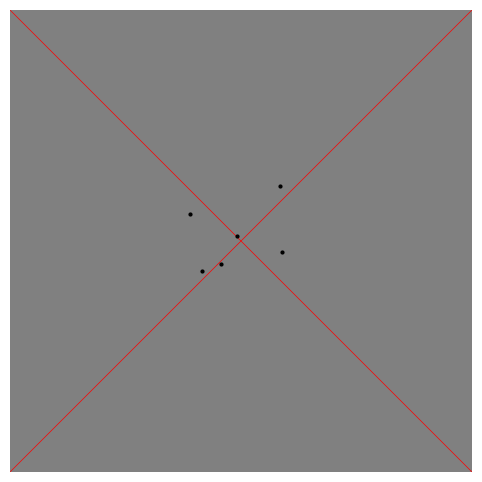

In [15]:
import matplotlib.pyplot as plt

# Create a figure and axis with a specific size (width, height in inches)
fig, ax = plt.subplots(figsize=[8,6])  # Square figure for better symmetry

# Change the background color to brown
ax.set_facecolor('gray')

# Coordinates for three black dots
# Set the range for x and y axes
Numerosity = 6
down_range = 1.5
up_range = 2.5
dot_positions = []

# Use numpy to generate all positions at once
dot_positions = np.random.uniform(down_range, up_range, (Numerosity, 2))


ax.plot([0, 4], [0, 4], 'r-', linewidth=0.5)  # Red line
ax.plot([0, 4], [4, 0], 'r-', linewidth=0.5)  # Red line
# Plot the three black dots
for pos in dot_positions:
    ax.plot(pos[0], pos[1], 'ko', markersize=2)  # 'ko' specifies black color ('k') and circle marker ('o')

# Draw diagonal lines crossing the center
# First diagonal line (from bottom-left to top-right)

# Set plot limits for better visibility and to focus on the central part
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

# Set equal scaling for x and y axes to make the diagonal lines straight
ax.set_aspect('equal')

# Remove grid and frame if desired
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove tick marks and labels
ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

# Save the plot to a file
plt.savefig('/Users/muku/Desktop/six_circumcont.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0)

# Display the plot
plt.show()


## Spatial frequency computation

In [16]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

# Example list of image URLs (replace these with your actual image URLs or file paths)
base_path = '/Users/muku/Desktop/Ph.D_MaxPlanck/Research/MINT/experiment/stimuli/visual'
image_paths = [
    os.path.join(base_path,'one_circumcont.png'),
    os.path.join(base_path,'two_circumcont.png'),
    os.path.join(base_path,'three_circumcont.png'),
    os.path.join(base_path,'four_circumcont.png'),
    os.path.join(base_path,'five_circumcont.png'),
    os.path.join(base_path,'six_circumcont.png')
]

# Dictionary to store images with unique variable names
images = {}

# Loop through URLs and download each image
for i, path in enumerate(image_paths):
    img = Image.open(path).convert('L')
    image_array = np.array(img)  # Open the image 
    variable_name = f"number_{i+1}"  # Create a unique variable name
    # Compute the 2D Fourier Transform
    fft_image = np.fft.fft2(image_array)

    # Shift the zero-frequency component to the center
    fft_image_shifted = np.fft.fftshift(fft_image)

    # Compute the Power Spectral Density (PSD)
    psd = np.abs(fft_image_shifted) ** 2

    # Get the dimensions of the PSD
    rows, cols = psd.shape

    # Create frequency grid
    x = np.arange(-cols // 2, cols // 2)
    y = np.arange(-rows // 2, rows // 2)
    xv, yv = np.meshgrid(x, y)
    radius = np.sqrt(xv**2 + yv**2)

    # Create annular bins
    max_radius = int(np.max(radius))
    annular_bins = np.arange(0, max_radius, 1)

    psd_annular_sum = []
    for r in annular_bins:
        annular_mask = (radius >= r) & (radius < r + 1)
        sum_value = psd[annular_mask].sum()
        psd_annular_sum.append(sum_value)


    images[variable_name] = psd_annular_sum




Plot the power for each frequency

In [ ]:
### ~~~~~~~~~~~ Figure loop

colors = ['b', 'g', 'r', 'c', 'm', 'y']
plt.figure(figsize=(10, 6))

# Iterate through each dataset and plot it
for i, (key, data) in enumerate(images.items()):
    plt.plot(data[:30], marker='o', linestyle='-', color=colors[i], label=key)

plt.yscale('log')
plt.xlabel('Spatial Frequency (cycles/image)', size=15)
plt.ylabel('Power Spectral Density (cycles/image)',  size=15)
ticks = np.arange(30) # Customize x-axis tick labels to start from 1
plt.xticks(ticks, ticks + 1)
plt.legend()
plt.grid(False)
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Hide the top spine
ax.spines['right'].set_visible(False) 
# Save the plot to a file
plt.savefig('/Users/muku/Desktop/SF.png', format='png', bbox_inches='tight', pad_inches=0.2)

plt.show()

### Plot the 2D Fourier transform
plt.subplot(122)
plt.imshow(np.log(1 + psd), cmap='gray')  # Use log scaling for better visualization
plt.axis('off')

# RDM for spatial frequency


Nz_Dissimilarity Matrix:
           number_1  number_2  number_3  number_4      number_5      number_6
number_1  0.000000  0.941457  0.994688  0.999048  9.997489e-01  1.000000e+00
number_2  0.941457  0.000000  0.002224  0.002846  2.931376e-03  2.953567e-03
number_3  0.994688  0.002224  0.000000  0.000120  1.567052e-04  1.677173e-04
number_4  0.999048  0.002846  0.000120  0.000000  7.278442e-06  1.102242e-05
number_5  0.999749  0.002931  0.000157  0.000007  0.000000e+00  8.233347e-07
number_6  1.000000  0.002954  0.000168  0.000011  8.233347e-07  0.000000e+00


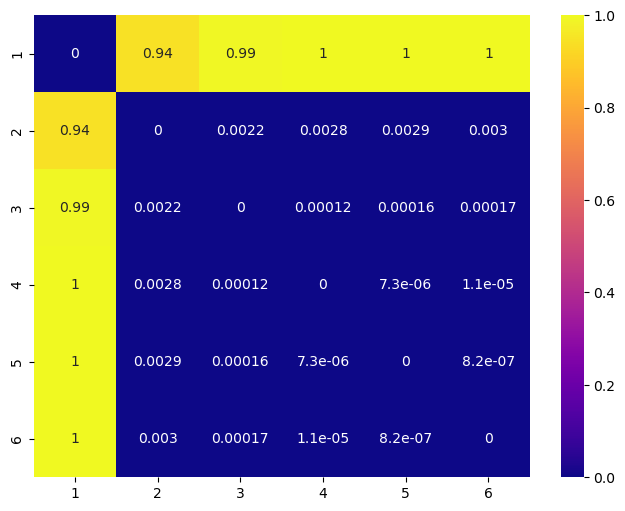

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns

# Example: Create a random DataFrame with 6 columns and 1000 rows
np.random.seed(0)  # For reproducibility
data = pd.DataFrame(images)

# Step 1: Compute the correlation matrix
correlation_matrix = data.corr()

# Step 2: Convert to dissimilarity matrix by subtracting each correlation value from 1
dissimilarity_matrix = 1 - correlation_matrix

nz_dissimilarity_matrix = dissimilarity_matrix / np.max(dissimilarity_matrix)

# print("Correlation Matrix:\n", correlation_matrix)
# print("\nDissimilarity Matrix:\n", dissimilarity_matrix)
print("\nNz_Dissimilarity Matrix:\n", nz_dissimilarity_matrix)

# Visualize the RDM using a heatmap
numerosities = np.arange(1, 7)
plt.figure(figsize=(8, 6))
sns.heatmap(nz_dissimilarity_matrix, annot=True, cmap="plasma", xticklabels=numerosities, yticklabels=numerosities)
plt.savefig('/Users/muku/Desktop/RDM_SF_circumcont.png', format='png', bbox_inches='tight', pad_inches=0.2)
plt.show()

# Model RDM for numeroisty

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the range of numerosities
numerosities = np.arange(1, 7)  # From 1 to 10

# Initialize an empty RDM matrix
n = len(numerosities)
RDM = np.zeros((n, n))

# Compute the Euclidean distance between each pair of numerosities
for i in range(n):
    for j in range(n):
        RDM[i, j] = np.abs(numerosities[i] - numerosities[j])

# Optional: Normalize the RDM
RDM = RDM / np.max(RDM)

# Visualize the RDM using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(RDM, annot=True, cmap="plasma", xticklabels=numerosities, yticklabels=numerosities)
plt.savefig('/Users/muku/Desktop/RDM_numerosity.png', format='png', bbox_inches='tight', pad_inches=0.2)
plt.show()


# RDM for single dot area

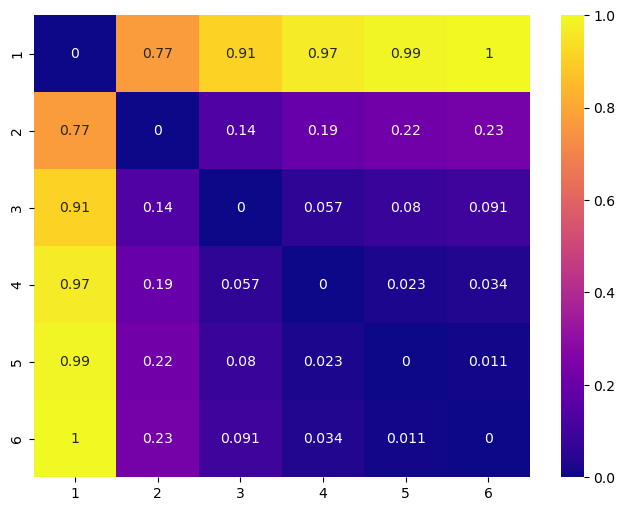

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the range of numerosities
numerosities = np.arange(1, 7)  # From 1 to 10
single_dot_area = [90, 22, 10, 5, 3, 2]

# Initialize an empty RDM matrix
n = len(numerosities)
RDM = np.zeros((n, n))

# Compute the Euclidean distance between each pair of numerosities
for i in range(n):
    for j in range(n):
        RDM[i, j] = np.abs(single_dot_area[i] - single_dot_area[j])

# Optional: Normalize the RDM
RDM = RDM / np.max(RDM)

# Visualize the RDM using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(RDM, annot=True, cmap="plasma", xticklabels=numerosities, yticklabels=numerosities)
plt.savefig('/Users/muku/Desktop/RDM_singledotarea_circumcont.png', format='png', bbox_inches='tight', pad_inches=0.2)
plt.show()


# RDM for circumference

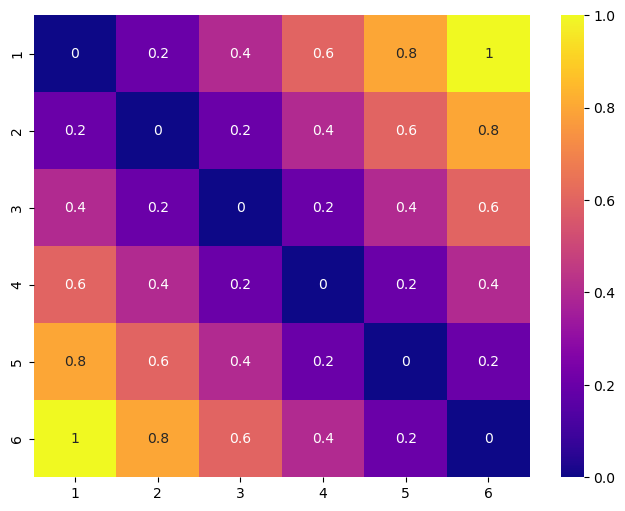

In [1]:
import numpy as np  # Re-import numpy after deleting the incorrect variable
import matplotlib.pyplot as plt
import seaborn as sns

# Define the range of numerosities
numerosities = np.arange(1, 7)  # From 1 to 10
circumference = [11.2, 22.4, 33.6, 44.8, 56.0, 67.2]

# Initialize an empty RDM matrix
n = len(numerosities)
RDM = np.zeros((n, n))

# Compute the Euclidean distance between each pair of numerosities
for i in range(n):
    for j in range(n):
        RDM[i, j] = np.abs(circumference[i] - circumference[j])

# Optional: Normalize the RDM
RDM = RDM / np.max(RDM)

# Visualize the RDM using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(RDM, annot=True, cmap="plasma", xticklabels=numerosities, yticklabels=numerosities)
plt.savefig('/Users/muku/Desktop/RDM_circumference_singledotcont.png', format='png', bbox_inches='tight', pad_inches=0.2)
plt.show()


In [173]:
type(n)

int

In [7]:
_trialList =  [   
    {'condition': '1_con_duration', 'single_duration': 0.62, 'numerosity': 1},
    {'condition': '2_con_duration', 'single_duration': 0.26, 'numerosity': 2},
    {'condition': '3_con_duration', 'single_duration': 0.14, 'numerosity': 3},
    {'condition': '4_con_duration', 'single_duration': 0.08, 'numerosity': 4},
    {'condition': '5_con_duration', 'single_duration': 0.044, 'numerosity': 5},
    {'condition': '6_con_duration', 'single_duration': 0.02, 'numerosity': 6},
    {'condition': '1_con_rate', 'single_duration': 0.02, 'numerosity': 1},
    {'condition': '2_con_rate', 'single_duration': 0.02, 'numerosity': 2},
    {'condition': '3_con_rate', 'single_duration': 0.02, 'numerosity': 3},
    {'condition': '4_con_rate', 'single_duration': 0.02, 'numerosity': 4},
    {'condition': '5_con_rate', 'single_duration': 0.02, 'numerosity': 5},
    {'condition': '6_con_rate', 'single_duration': 0.02, 'numerosity': 6},
    ]

In [79]:
visual_angle_info = [
    {'visual_angle_deg': 0.75, 'circle_raidius_pixels': 25},
    {'visual_angle_deg': 1, 'circle_raidius_pixels': 33}, 
    {'visual_angle_deg': 2, 'circle_raidius_pixels': 67}, 
    ]
this_visual_angle_info = visual_angle_info[0]
print(this_visual_angle_info['visual_angle_deg'])

0.75


# Visual dots generation 
### single dot size is identical

In [4]:
"""
TODOS:
    - how much visual angle?
Info:
    - Numerosity from 1 ~ 6
  
"""

from PIL import Image, ImageDraw
import math
import random
import os

# Constants
width, height = 1920, 1080  # Image dimensions
distance_cm = 50  # Distance from the viewer in cm
screen_width_cm = 50  # Screen width in cm
screen_height_cm = 28  # Screen width in cm
visual_angle_info = [
    {'visual_angle_deg': 0.75, 'circle_raidius_pixels': 25, 'dot_radius_pixels': 3, 'desired_distance': 12},
    {'visual_angle_deg': 1, 'circle_raidius_pixels': 33, 'dot_radius_pixels': 3, 'desired_distance': 15}, 
    {'visual_angle_deg': 2, 'circle_raidius_pixels': 67, 'dot_radius_pixels': 3, 'desired_distance': 30}, 
    ]
this_visual_angle_info = visual_angle_info[2] # 0.75, 1 or 2 Visual angle in degrees
visual_angle_deg = this_visual_angle_info['visual_angle_deg']  
circle_radius_pixels = this_visual_angle_info['circle_raidius_pixels']   # when it's 1 degree https://www.sr-research.com/visual-angle-calculator/
dot_radius_pixels = this_visual_angle_info['dot_radius_pixels'] # Radius of each dot
desired_distance = this_visual_angle_info['desired_distance'] # Desired distance from the first dot in pixels

# controled parameter
control = 'singledotsize_cont' # 'totaldotsize_cont', 'circumference_cont'

# Base directory for storing images
base_dir = os.getcwd() # '__file__' indicate the current directory of this script
target_dir = base_dir + os.sep + 'stimuli/visual/' + control

# Create a blank image with gray background
image = Image.new("RGB", (width, height), (128, 128, 128))
draw = ImageDraw.Draw(image)

# Calculate the center of the image
center_x, center_y = width // 2, height // 2

# Draw diagonal red lines
draw.line((0, 0, width, height), fill=(255, 0, 0), width=1)  # Line from top left to bottom right
draw.line((width, 0, 0, height), fill=(255, 0, 0), width=1)  # Line from top right to bottom left

# Store positions of the dots
dot_positions = []

# Function to calculate Euclidean distance between two points
def euclidean_distance(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)



# Loop through each numerosity (from 1 to 6)
for numerosity in range(1, 7):

    # Create a directory for each numerosity if it doesn't exist
    numerosity_dir = os.path.join(target_dir, f"numerosity_{numerosity}")
    os.makedirs(numerosity_dir, exist_ok=True)
    
    # Generate 70 images for each numerosity
    for img_num in range(1, 71):
        
        # Create a blank image with gray background
        image = Image.new("RGB", (width, height), (128, 128, 128))
        draw = ImageDraw.Draw(image)

        # Calculate the center of the image
        center_x, center_y = width // 2, height // 2

        # Draw diagonal red lines
        draw.line((0, 0, width, height), fill=(255, 0, 0), width=1)  # Line from top left to bottom right
        draw.line((width, 0, 0, height), fill=(255, 0, 0), width=1)  # Line from top right to bottom left

        # Store positions of the dots
        dot_positions = []

        # Place the first dot randomly inside the circle
        angle = random.uniform(0, 2 * math.pi)
        radius_offset = random.uniform(0, circle_radius_pixels/2)
        dot_x = center_x + radius_offset * math.cos(angle)
        dot_y = center_y + radius_offset * math.sin(angle)
        dot_positions.append((dot_x, dot_y))

        # Draw the first dot
        draw.ellipse(
            (dot_x - dot_radius_pixels, dot_y - dot_radius_pixels, 
             dot_x + dot_radius_pixels, dot_y + dot_radius_pixels),  # Small dot size
            fill="black"
        )

        # Place the remaining dots at a controlled distance from the first dot
        for _ in range(1, numerosity):
            while True:
                # Random angle around the first dot
                angle = random.uniform(0, 2 * math.pi)

                # Set the dot position around the specified Euclidean distance from the first dot
                dot_x = dot_positions[0][0] + desired_distance * math.cos(angle)
                dot_y = dot_positions[0][1] + desired_distance * math.sin(angle)

                # Check if the new dot overlaps with the first dot or goes out of bounds
                overlap = False
                for (existing_x, existing_y) in dot_positions:
                    if euclidean_distance(dot_x, dot_y, existing_x, existing_y) < 2 * dot_radius_pixels + 1:
                        overlap = True
                        break

                # If no overlap and the dot is inside the circle, draw the dot
                if not overlap and euclidean_distance(dot_x, dot_y, center_x, center_y) <= circle_radius_pixels:
                    dot_positions.append((dot_x, dot_y))
                    draw.ellipse(
                        (dot_x - dot_radius_pixels, dot_y - dot_radius_pixels, 
                         dot_x + dot_radius_pixels, dot_y + dot_radius_pixels),  # Small dot size
                        fill="black"
                    )
                    break  # Exit while loop after placing the dot

        # Save the image with a unique name
        image_path = os.path.join(numerosity_dir, f"image_{img_num}.png")
        image.save(image_path)

### total dot size is identical

In [105]:
"""
TODOS:
    - how much visual angle?
Info:
    - Numerosity from 1 ~ 6
  
"""

from PIL import Image, ImageDraw
import math
import random
import os

# Constants
width, height = 1920, 1080  # Image dimensions
distance_cm = 50  # Distance from the viewer in cm
screen_width_cm = 50  # Screen width in cm
screen_height_cm = 28  # Screen width in cm
visual_angle_info = [
    {'visual_angle_deg': 0.75, 'circle_raidius_pixels': 25, 'desired_distance': 12},
    {'visual_angle_deg': 1, 'circle_raidius_pixels': 33, 'desired_distance': 15}, 
    {'visual_angle_deg': 2, 'circle_raidius_pixels': 67, 'desired_distance': 30}, 
    ]

# chose desired degree
this_visual_angle_info = visual_angle_info[1] # 0.75, 1 or 2 Visual angle in degrees
visual_angle_deg = this_visual_angle_info['visual_angle_deg']  
circle_radius_pixels = this_visual_angle_info['circle_raidius_pixels']   # when it's 1 degree https://www.sr-research.com/visual-angle-calculator/
desired_distance = this_visual_angle_info['desired_distance'] # Desired distance from the first dot in pixels

# controled parameter
control = 'totaldotsize_cont' # 'totaldotsize_cont', 'circumference_cont'

# Base directory for storing images
base_dir = os.getcwd() # '__file__' indicate the current directory of this script
target_dir = base_dir + os.sep + 'stimuli/visual/' + control

# Create a blank image with gray background
image = Image.new("RGB", (width, height), (128, 128, 128))
draw = ImageDraw.Draw(image)

# Calculate the center of the image
center_x, center_y = width // 2, height // 2

# Draw diagonal red lines
draw.line((0, 0, width, height), fill=(255, 0, 0), width=1)  # Line from top left to bottom right
draw.line((width, 0, 0, height), fill=(255, 0, 0), width=1)  # Line from top right to bottom left

# Store positions of the dots
dot_positions = []

# Function to calculate Euclidean distance between two points
def euclidean_distance(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)


dot_radius_pixels_list = []
# Loop through each numerosity (from 1 to 6)
for numerosity in range(1, 7):

    # Create a directory for each numerosity if it doesn't exist
    numerosity_dir = os.path.join(target_dir, f"numerosity_{numerosity}")
    os.makedirs(numerosity_dir, exist_ok=True)
    
    # Calculate the total area for the dots and adjust dot radius
    total_area = math.pi * (circle_radius_pixels) ** 2  # Total area occupied by the dots
    single_dot_area = (total_area/15) / numerosity  # Area for each dot
    dot_radius_pixels = math.sqrt(single_dot_area / math.pi)  # Adjusted radius based on the area
    dot_radius_pixels_list.append(dot_radius_pixels)


    # Generate 70 images for each numerosity
    for img_num in range(1, 71):
        
        # Create a blank image with gray background
        image = Image.new("RGB", (width, height), (128, 128, 128))
        draw = ImageDraw.Draw(image)

        # Calculate the center of the image
        center_x, center_y = width // 2, height // 2

        # Draw diagonal red lines
        draw.line((0, 0, width, height), fill=(255, 0, 0), width=1)  # Line from top left to bottom right
        draw.line((width, 0, 0, height), fill=(255, 0, 0), width=1)  # Line from top right to bottom left

        # Store positions of the dots
        dot_positions = []

        # Place the first dot randomly inside the circle
        angle = random.uniform(0, 2 * math.pi)
        radius_offset = random.uniform(0, circle_radius_pixels/2)
        dot_x = center_x + radius_offset * math.cos(angle)
        dot_y = center_y + radius_offset * math.sin(angle)
        dot_positions.append((dot_x, dot_y))

        # Draw the first dot
        draw.ellipse(
            (dot_x - dot_radius_pixels, dot_y - dot_radius_pixels, 
             dot_x + dot_radius_pixels, dot_y + dot_radius_pixels),  # Small dot size
            fill="black"
        )

        # Place the remaining dots at a controlled distance from the first dot
        for _ in range(1, numerosity):
            while True:
                # Random angle around the first dot
                angle = random.uniform(0, 2 * math.pi)

                # Set the dot position around the specified Euclidean distance from the first dot
                dot_x = dot_positions[0][0] + desired_distance * math.cos(angle)
                dot_y = dot_positions[0][1] + desired_distance * math.sin(angle)

                # Check if the new dot overlaps with the first dot or goes out of bounds
                overlap = False
                for (existing_x, existing_y) in dot_positions:
                    if euclidean_distance(dot_x, dot_y, existing_x, existing_y) < 2 * dot_radius_pixels + 1:
                        overlap = True
                        break

                # If no overlap and the dot is inside the circle, draw the dot
                if not overlap and euclidean_distance(dot_x, dot_y, center_x, center_y) <= circle_radius_pixels:
                    dot_positions.append((dot_x, dot_y))
                    draw.ellipse(
                        (dot_x - dot_radius_pixels, dot_y - dot_radius_pixels, 
                         dot_x + dot_radius_pixels, dot_y + dot_radius_pixels),  # Small dot size
                        fill="black"
                    )
                    break  # Exit while loop after placing the dot

        # Save the image with a unique name
        image_path = os.path.join(numerosity_dir, f"image_{img_num}.png")
        image.save(image_path)

### circumference is identical

In [12]:
"""
TODOS:
    - how much visual angle?
Info:
    - Numerosity from 1 ~ 6
  
"""

from PIL import Image, ImageDraw
import math
import random
import os

# Constants
width, height = 1920, 1080  # Image dimensions
distance_cm = 50  # Distance from the viewer in cm
screen_width_cm = 50  # Screen width in cm
screen_height_cm = 28  # Screen width in cm
visual_angle_info = [
    {'visual_angle_deg': 0.75, 'circle_raidius_pixels': 25, 'desired_distance': 12},
    {'visual_angle_deg': 1, 'circle_raidius_pixels': 33, 'desired_distance': 15}, 
    {'visual_angle_deg': 2, 'circle_raidius_pixels': 67, 'desired_distance': 30}, 
    ]

# chose desired degree
this_visual_angle_info = visual_angle_info[2] # 0.75, 1 or 2 Visual angle in degrees
visual_angle_deg = this_visual_angle_info['visual_angle_deg']  
circle_radius_pixels = this_visual_angle_info['circle_raidius_pixels']   # when it's 1 degree https://www.sr-research.com/visual-angle-calculator/
desired_distance = this_visual_angle_info['desired_distance'] # Desired distance from the first dot in pixels

# controled parameter
control = 'circumference_cont' # 'singlesize_cont', 'totaldotsize_cont', 'circumference_cont'

# Base directory for storing images
base_dir = os.getcwd() # '__file__' indicate the current directory of this script
target_dir = base_dir + os.sep + 'stimuli/visual/' + control

# Create a blank image with gray background
image = Image.new("RGB", (width, height), (128, 128, 128))
draw = ImageDraw.Draw(image)

# Calculate the center of the image
center_x, center_y = width // 2, height // 2

# Draw diagonal red lines
draw.line((0, 0, width, height), fill=(255, 0, 0), width=1)  # Line from top left to bottom right
draw.line((width, 0, 0, height), fill=(255, 0, 0), width=1)  # Line from top right to bottom left

# Store positions of the dots
dot_positions = []

# Function to calculate Euclidean distance between two points
def euclidean_distance(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)


dot_radius_pixels_list = []
# Loop through each numerosity (from 1 to 6)
for numerosity in range(1, 7):

    # Create a directory for each numerosity if it doesn't exist
    numerosity_dir = os.path.join(target_dir, f"numerosity_{numerosity}")
    os.makedirs(numerosity_dir, exist_ok=True)
    
    # Calculate the total area for the dots and adjust dot radius
    total_area = math.pi * (circle_radius_pixels) ** 2  # Total area occupied by the dots
    single_dot_area = (total_area/3) / numerosity  # Area for each dot
    dot_radius_pixels = math.sqrt(single_dot_area / math.pi)  # Adjusted radius based on the area
    circumference = 2 * math.pi * dot_radius_pixels
    if numerosity == 1:
        dot_radius_pixels = dot_radius_pixels
    else:
        circumference_per_dot = circumference/numerosity
        dot_radius_pixels = circumference_per_dot / (2 * math.pi)
    # store the radius
    dot_radius_pixels_list.append(dot_radius_pixels)


    # Generate 70 images for each numerosity
    for img_num in range(1, 71):
        
        # Create a blank image with gray background
        image = Image.new("RGB", (width, height), (128, 128, 128))
        draw = ImageDraw.Draw(image)

        # Calculate the center of the image
        center_x, center_y = width // 2, height // 2

        # Draw diagonal red lines
        draw.line((0, 0, width, height), fill=(255, 0, 0), width=1)  # Line from top left to bottom right
        draw.line((width, 0, 0, height), fill=(255, 0, 0), width=1)  # Line from top right to bottom left

        # Store positions of the dots
        dot_positions = []

        # Place the first dot randomly inside the circle
        angle = random.uniform(0, 2 * math.pi)
        radius_offset = random.uniform(0, circle_radius_pixels/2)
        dot_x = center_x + radius_offset * math.cos(angle)
        dot_y = center_y + radius_offset * math.sin(angle)
        dot_positions.append((dot_x, dot_y))

        # Draw the first dot
        draw.ellipse(
            (dot_x - dot_radius_pixels, dot_y - dot_radius_pixels, 
             dot_x + dot_radius_pixels, dot_y + dot_radius_pixels),  # Small dot size
            fill="black"
        )

        # Place the remaining dots at a controlled distance from the first dot
        for _ in range(1, numerosity):
            while True:
                # Random angle around the first dot
                angle = random.uniform(0, 2 * math.pi)

                # Set the dot position around the specified Euclidean distance from the first dot
                dot_x = dot_positions[0][0] + desired_distance * math.cos(angle)
                dot_y = dot_positions[0][1] + desired_distance * math.sin(angle)

                # Check if the new dot overlaps with the first dot or goes out of bounds
                overlap = False
                for (existing_x, existing_y) in dot_positions:
                    if euclidean_distance(dot_x, dot_y, existing_x, existing_y) < 2 * dot_radius_pixels + 1:
                        overlap = True
                        break

                # If no overlap and the dot is inside the circle, draw the dot
                if not overlap and euclidean_distance(dot_x, dot_y, center_x, center_y) <= circle_radius_pixels:
                    dot_positions.append((dot_x, dot_y))
                    draw.ellipse(
                        (dot_x - dot_radius_pixels, dot_y - dot_radius_pixels, 
                         dot_x + dot_radius_pixels, dot_y + dot_radius_pixels),  # Small dot size
                        fill="black"
                    )
                    break  # Exit while loop after placing the dot

        # Save the image with a unique name
        image_path = os.path.join(numerosity_dir, f"image_{img_num}.png")
        image.save(image_path)

### Single dot size, randomly distributed

In [26]:
"""
TODOS:
    - how much visual angle?
Info:
    - Numerosity from 1 ~ 6
  
"""

from PIL import Image, ImageDraw
import math
import random
import os

# Constants
width, height = 1920, 1080  # Image dimensions
distance_cm = 50  # Distance from the viewer in cm
screen_width_cm = 50  # Screen width in cm
screen_height_cm = 28  # Screen width in cm
visual_angle_info = [
    {'visual_angle_deg': 0.75, 'circle_raidius_pixels': 25, 'dot_radius_pixels': 5, 'desired_distance': 12},
    {'visual_angle_deg': 1, 'circle_raidius_pixels': 33, 'dot_radius_pixels': 7, 'desired_distance': 15}, 
    {'visual_angle_deg': 2, 'circle_raidius_pixels': 67, 'dot_radius_pixels': 10, 'desired_distance': 30}, 
    ]
this_visual_angle_info = visual_angle_info[2] # 0.75, 1 or 2 Visual angle in degrees
visual_angle_deg = this_visual_angle_info['visual_angle_deg']  
circle_radius_pixels = this_visual_angle_info['circle_raidius_pixels']   # when it's 1 degree https://www.sr-research.com/visual-angle-calculator/
dot_radius_pixels = this_visual_angle_info['dot_radius_pixels'] # Radius of each dot
desired_distance = this_visual_angle_info['desired_distance'] # Desired distance from the first dot in pixels

# controled parameter
control = 'singledotsize_cont' # 'totaldotsize_cont', 'circumference_cont'

# Base directory for storing images
base_dir = os.getcwd() # '__file__' indicate the current directory of this script
target_dir = base_dir + os.sep + 'stimuli/visual/' + control

# Create a blank image with gray background
image = Image.new("RGB", (width, height), (128, 128, 128))
draw = ImageDraw.Draw(image)

# Calculate the center of the image
center_x, center_y = width // 2, height // 2

# Draw diagonal red lines
draw.line((0, 0, width, height), fill=(255, 0, 0), width=1)  # Line from top left to bottom right
draw.line((width, 0, 0, height), fill=(255, 0, 0), width=1)  # Line from top right to bottom left

# Store positions of the dots
dot_positions = []

# Function to calculate Euclidean distance between two points
def euclidean_distance(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)



# Loop through each numerosity (from 1 to 6)
for numerosity in range(1, 7):

    # Create a directory for each numerosity if it doesn't exist
    numerosity_dir = os.path.join(target_dir, f"numerosity_{numerosity}")
    os.makedirs(numerosity_dir, exist_ok=True)
    
    # Generate 70 images for each numerosity
    for img_num in range(1, 71):
        
        # Create a blank image with gray background
        image = Image.new("RGB", (width, height), (128, 128, 128))
        draw = ImageDraw.Draw(image)

        # Calculate the center of the image
        center_x, center_y = width // 2, height // 2

        # Draw diagonal red lines
        draw.line((0, 0, width, height), fill=(255, 0, 0), width=1)  # Line from top left to bottom right
        draw.line((width, 0, 0, height), fill=(255, 0, 0), width=1)  # Line from top right to bottom left

        # Store positions of the dots
        dot_positions = []

        # Place the first dot randomly inside the circle
        angle = random.uniform(0, 2 * math.pi)
        radius_offset = random.uniform(0, circle_radius_pixels)
        dot_x = center_x + radius_offset * math.cos(angle)
        dot_y = center_y + radius_offset * math.sin(angle)
        dot_positions.append((dot_x, dot_y))

        # Draw the first dot
        draw.ellipse(
            (dot_x - dot_radius_pixels, dot_y - dot_radius_pixels, 
             dot_x + dot_radius_pixels, dot_y + dot_radius_pixels),  # Small dot size
            fill="black"
        )

        # Place the remaining dots at a controlled distance from the first dot
        for _ in range(1, numerosity):
            while True:
                # Random angle around the first dot
                angle = random.uniform(0, 2 * math.pi)
                radius_offset = random.uniform(0, circle_radius_pixels)
                dot_x = center_x + radius_offset * math.cos(angle)
                dot_y = center_y + radius_offset * math.sin(angle)

                # Check if the new dot overlaps with the first dot or goes out of bounds
                overlap = False
                for (existing_x, existing_y) in dot_positions:
                    if euclidean_distance(dot_x, dot_y, existing_x, existing_y) < 2 * dot_radius_pixels + 3:
                        overlap = True
                        break

                # If no overlap and the dot is inside the circle, draw the dot
                if not overlap and euclidean_distance(dot_x, dot_y, center_x, center_y) <= circle_radius_pixels:
                    dot_positions.append((dot_x, dot_y))
                    draw.ellipse(
                        (dot_x - dot_radius_pixels, dot_y - dot_radius_pixels, 
                         dot_x + dot_radius_pixels, dot_y + dot_radius_pixels),  # Small dot size
                        fill="black"
                    )
                    break  # Exit while loop after placing the dot

        # Save the image with a unique name
        image_path = os.path.join(numerosity_dir, f"image_{img_num}.png")
        image.save(image_path)

### total dot size, randomely distributed

In [29]:
"""
TODOS:
    - how much visual angle?
Info:
    - Numerosity from 1 ~ 6
  
"""

from PIL import Image, ImageDraw
import math
import random
import os

# Constants
width, height = 1920, 1080  # Image dimensions
distance_cm = 50  # Distance from the viewer in cm
screen_width_cm = 50  # Screen width in cm
screen_height_cm = 28  # Screen width in cm
visual_angle_info = [
    {'visual_angle_deg': 0.75, 'circle_raidius_pixels': 25, 'desired_distance': 12},
    {'visual_angle_deg': 1, 'circle_raidius_pixels': 33, 'desired_distance': 15}, 
    {'visual_angle_deg': 2, 'circle_raidius_pixels': 67, 'desired_distance': 30}, 
    ]

# chose desired degree
this_visual_angle_info = visual_angle_info[2] # 0.75, 1 or 2 Visual angle in degrees
visual_angle_deg = this_visual_angle_info['visual_angle_deg']  
circle_radius_pixels = this_visual_angle_info['circle_raidius_pixels']   # when it's 1 degree https://www.sr-research.com/visual-angle-calculator/
desired_distance = this_visual_angle_info['desired_distance'] # Desired distance from the first dot in pixels

# controled parameter
control = 'totaldotsize_cont' # 'totaldotsize_cont', 'circumference_cont'

# Base directory for storing images
base_dir = os.getcwd() # '__file__' indicate the current directory of this script
target_dir = base_dir + os.sep + 'stimuli/visual/' + control

# Create a blank image with gray background
image = Image.new("RGB", (width, height), (128, 128, 128))
draw = ImageDraw.Draw(image)

# Calculate the center of the image
center_x, center_y = width // 2, height // 2

# Draw diagonal red lines
draw.line((0, 0, width, height), fill=(255, 0, 0), width=1)  # Line from top left to bottom right
draw.line((width, 0, 0, height), fill=(255, 0, 0), width=1)  # Line from top right to bottom left

# Store positions of the dots
dot_positions = []

# Function to calculate Euclidean distance between two points
def euclidean_distance(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)


dot_radius_pixels_list = []
# Loop through each numerosity (from 1 to 6)
for numerosity in range(1, 7):

    # Create a directory for each numerosity if it doesn't exist
    numerosity_dir = os.path.join(target_dir, f"numerosity_{numerosity}")
    os.makedirs(numerosity_dir, exist_ok=True)
    
    # Calculate the total area for the dots and adjust dot radius
    total_area = math.pi * (circle_radius_pixels) ** 2  # Total area occupied by the dots
    single_dot_area = (total_area/5) / numerosity  # Area for each dot
    dot_radius_pixels = math.sqrt(single_dot_area / math.pi)  # Adjusted radius based on the area
    dot_radius_pixels_list.append(dot_radius_pixels)


    # Generate 70 images for each numerosity
    for img_num in range(1, 71):
        
        # Create a blank image with gray background
        image = Image.new("RGB", (width, height), (128, 128, 128))
        draw = ImageDraw.Draw(image)

        # Calculate the center of the image
        center_x, center_y = width // 2, height // 2

        # Draw diagonal red lines
        draw.line((0, 0, width, height), fill=(255, 0, 0), width=1)  # Line from top left to bottom right
        draw.line((width, 0, 0, height), fill=(255, 0, 0), width=1)  # Line from top right to bottom left

        # Store positions of the dots
        dot_positions = []

        # Place the first dot randomly inside the circle
        angle = random.uniform(0, 2 * math.pi)
        radius_offset = random.uniform(0, circle_radius_pixels)
        dot_x = center_x + radius_offset * math.cos(angle)
        dot_y = center_y + radius_offset * math.sin(angle)
        dot_positions.append((dot_x, dot_y))

        # Draw the first dot
        draw.ellipse(
            (dot_x - dot_radius_pixels, dot_y - dot_radius_pixels, 
             dot_x + dot_radius_pixels, dot_y + dot_radius_pixels),  # Small dot size
            fill="black"
        )

        # Place the remaining dots at a controlled distance from the first dot
        for _ in range(1, numerosity):
            while True:
                # Random angle around the first dot
                angle = random.uniform(0, 2 * math.pi)
                radius_offset = random.uniform(0, circle_radius_pixels)
                # Set the dot position around the specified Euclidean distance from the first dot
                dot_x = center_x + radius_offset * math.cos(angle)
                dot_y = center_y + radius_offset * math.sin(angle)

                # Check if the new dot overlaps with the first dot or goes out of bounds
                overlap = False
                for (existing_x, existing_y) in dot_positions:
                    if euclidean_distance(dot_x, dot_y, existing_x, existing_y) < 2 * dot_radius_pixels + 3:
                        overlap = True
                        break

                # If no overlap and the dot is inside the circle, draw the dot
                if not overlap and euclidean_distance(dot_x, dot_y, center_x, center_y) <= circle_radius_pixels:
                    dot_positions.append((dot_x, dot_y))
                    draw.ellipse(
                        (dot_x - dot_radius_pixels, dot_y - dot_radius_pixels, 
                         dot_x + dot_radius_pixels, dot_y + dot_radius_pixels),  # Small dot size
                        fill="black"
                    )
                    break  # Exit while loop after placing the dot

        # Save the image with a unique name
        image_path = os.path.join(numerosity_dir, f"image_{img_num}.png")
        image.save(image_path)

### circumference, randomly distributed

In [35]:
"""
TODOS:
    - how much visual angle?
Info:
    - Numerosity from 1 ~ 6
  
"""

from PIL import Image, ImageDraw
import math
import random
import os

# Constants
width, height = 1920, 1080  # Image dimensions
distance_cm = 50  # Distance from the viewer in cm
screen_width_cm = 50  # Screen width in cm
screen_height_cm = 28  # Screen width in cm
visual_angle_info = [
    {'visual_angle_deg': 0.75, 'circle_raidius_pixels': 25, 'desired_distance': 12},
    {'visual_angle_deg': 1, 'circle_raidius_pixels': 33, 'desired_distance': 15}, 
    {'visual_angle_deg': 2, 'circle_raidius_pixels': 67, 'desired_distance': 30}, 
    ]

# chose desired degree
this_visual_angle_info = visual_angle_info[2] # 0.75, 1 or 2 Visual angle in degrees
visual_angle_deg = this_visual_angle_info['visual_angle_deg']  
circle_radius_pixels = this_visual_angle_info['circle_raidius_pixels']   # when it's 1 degree https://www.sr-research.com/visual-angle-calculator/
desired_distance = this_visual_angle_info['desired_distance'] # Desired distance from the first dot in pixels

# controled parameter
control = 'circumference_cont' # 'singlesize_cont', 'totaldotsize_cont', 'circumference_cont'

# Base directory for storing images
base_dir = os.getcwd() # '__file__' indicate the current directory of this script
target_dir = base_dir + os.sep + 'stimuli/visual/' + control

# Create a blank image with gray background
image = Image.new("RGB", (width, height), (128, 128, 128))
draw = ImageDraw.Draw(image)

# Calculate the center of the image
center_x, center_y = width // 2, height // 2

# Draw diagonal red lines
draw.line((0, 0, width, height), fill=(255, 0, 0), width=1)  # Line from top left to bottom right
draw.line((width, 0, 0, height), fill=(255, 0, 0), width=1)  # Line from top right to bottom left

# Store positions of the dots
dot_positions = []

# Function to calculate Euclidean distance between two points
def euclidean_distance(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)


dot_radius_pixels_list = []
# Loop through each numerosity (from 1 to 6)
for numerosity in range(1, 7):

    # Create a directory for each numerosity if it doesn't exist
    numerosity_dir = os.path.join(target_dir, f"numerosity_{numerosity}")
    os.makedirs(numerosity_dir, exist_ok=True)
    
    # Calculate the total area for the dots and adjust dot radius
    total_area = math.pi * (circle_radius_pixels) ** 2  # Total area occupied by the dots
    single_dot_area = (total_area/1.5) / numerosity  # Area for each dot
    dot_radius_pixels = math.sqrt(single_dot_area / math.pi)  # Adjusted radius based on the area
    circumference = 2 * math.pi * dot_radius_pixels
    if numerosity == 1:
        dot_radius_pixels = dot_radius_pixels
    else:
        circumference_per_dot = circumference/numerosity
        dot_radius_pixels = circumference_per_dot / (2 * math.pi)
    # store the radius
    dot_radius_pixels_list.append(dot_radius_pixels)


    # Generate 70 images for each numerosity
    for img_num in range(1, 71):
        
        # Create a blank image with gray background
        image = Image.new("RGB", (width, height), (128, 128, 128))
        draw = ImageDraw.Draw(image)

        # Calculate the center of the image
        center_x, center_y = width // 2, height // 2

        # Draw diagonal red lines
        draw.line((0, 0, width, height), fill=(255, 0, 0), width=1)  # Line from top left to bottom right
        draw.line((width, 0, 0, height), fill=(255, 0, 0), width=1)  # Line from top right to bottom left

        # Store positions of the dots
        dot_positions = []

        # Place the first dot randomly inside the circle
        angle = random.uniform(0, 2 * math.pi)
        radius_offset = random.uniform(0, circle_radius_pixels)
        dot_x = center_x + radius_offset * math.cos(angle)
        dot_y = center_y + radius_offset * math.sin(angle)
        dot_positions.append((dot_x, dot_y))

        # Draw the first dot
        draw.ellipse(
            (dot_x - dot_radius_pixels, dot_y - dot_radius_pixels, 
             dot_x + dot_radius_pixels, dot_y + dot_radius_pixels),  # Small dot size
            fill="black"
        )

        # Place the remaining dots at a controlled distance from the first dot
        for _ in range(1, numerosity):
            while True:
                # Random angle around the first dot
                angle = random.uniform(0, 2 * math.pi)
                radius_offset = random.uniform(0, circle_radius_pixels)
                # Set the dot position around the specified Euclidean distance from the first dot
                dot_x = center_x + radius_offset * math.cos(angle)
                dot_y = center_y + radius_offset * math.sin(angle)

                # Check if the new dot overlaps with the first dot or goes out of bounds
                overlap = False
                for (existing_x, existing_y) in dot_positions:
                    if euclidean_distance(dot_x, dot_y, existing_x, existing_y) < 2 * dot_radius_pixels + 3:
                        overlap = True
                        break

                # If no overlap and the dot is inside the circle, draw the dot
                if not overlap and euclidean_distance(dot_x, dot_y, center_x, center_y) <= circle_radius_pixels:
                    dot_positions.append((dot_x, dot_y))
                    draw.ellipse(
                        (dot_x - dot_radius_pixels, dot_y - dot_radius_pixels, 
                         dot_x + dot_radius_pixels, dot_y + dot_radius_pixels),  # Small dot size
                        fill="black"
                    )
                    break  # Exit while loop after placing the dot

        # Save the image with a unique name
        image_path = os.path.join(numerosity_dir, f"image_{img_num}.png")
        image.save(image_path)